In [8]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from gaussian_diffusion import GaussianDiffusion
import matplotlib.pyplot as plt
from models import UNet

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
model = UNet()
model(tf.zeros([4, 32, 32, 1]), tf.zeros([4]))
model.load_weights("diffusion_model.keras")

In [10]:
diffusion = GaussianDiffusion(model)

In [18]:
pred = diffusion.sample([4, 32, 32, 1])

sampling loop time step: 100%|██████████| 1000/1000 [00:10<00:00, 92.23it/s]


MovieWriter ffmpeg unavailable; using Pillow instead.


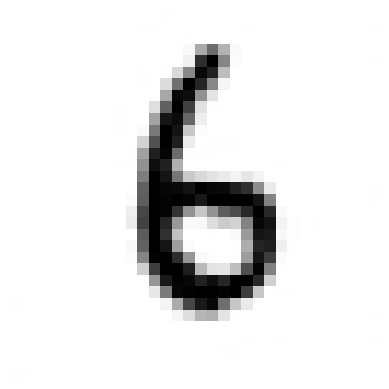

In [19]:
import time
import matplotlib.animation as animation
import numpy as np

%matplotlib inline

fig = plt.figure()
images = []
for i in range(diffusion.diffusion_steps):
    im = plt.imshow((pred[i, 0]+1.0)/2, vmin=0, vmax=1, cmap="gray_r", animated=True)
    plt.axis("off")
    images.append([im])
    
ani = animation.ArtistAnimation(fig, images, interval=50)
# plt.show()
ani.save("out.gif")

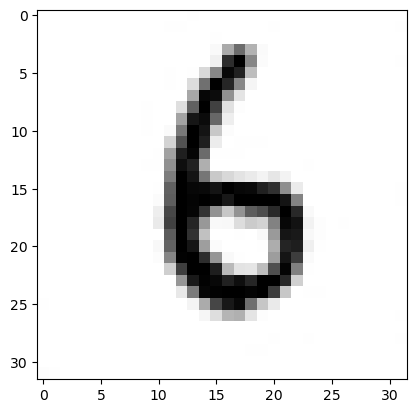

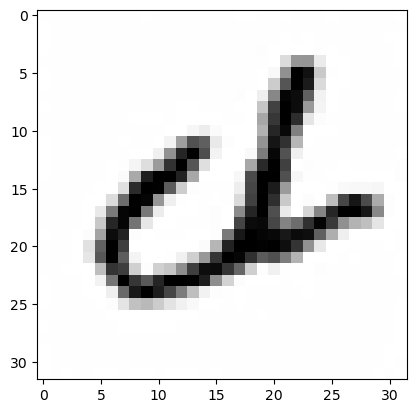

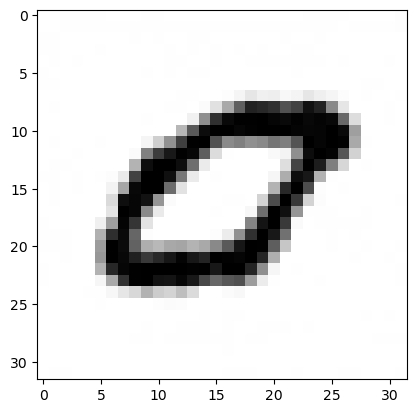

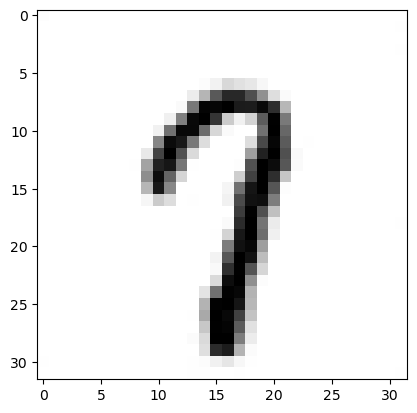

In [20]:
for i in range(pred.shape[1]):
    # plt.imshow((pred[-1, i]+1.0)/2, vmin=0, vmax=1, cmap="gray_r")
    plt.imshow((pred[-1, i]+1.0)/2, cmap="gray_r")
    plt.show()

In [21]:
pred[-1].max()

1.0

(array([3396.,   69.,   51.,   45.,   55.,   46.,   55.,   45.,   73.,
         261.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

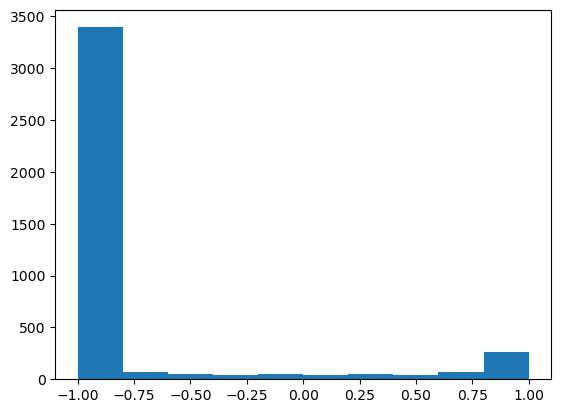

In [22]:
plt.hist(pred[-1].reshape(-1))